In [251]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Button
from scipy.special import erf
from signal_aligment import *
import h5py
import cv2 as cv
from skimage.transform import resize
import os
from sklearn import preprocessing as pre
import algotom.prep.removal as rem
import algotom.io.loadersaver as losa
import algotom.rec.reconstruction as rec
from skimage.util import img_as_uint
%matplotlib widget

In [199]:
cinquante = h5py.File(r'D:\meddah\isi_L3_1\1073_230414_0158_isi_L3_1_tomo___Z5_Y7090_50000eV_10x_750ms\1073_230414_0158_00001.h5', 'r')['entry/data/data'][20:-20,1572,:]
cinquanteFF = np.mean(h5py.File(r'D:\meddah\isi_L3_1\1073_230414_0158_isi_L3_1_tomo___Z5_Y7090_50000eV_10x_750ms\1073_230414_0158_00001.h5', 'r')['entry/data/data'][-15:,1572,:])
cinquantenorm = np.divide(cinquante-100, cinquanteFF-100)
quarante = h5py.File(r'D:\meddah\isi_L3_1\1079_230414_0451_isi_L3_1_tomo___Z5_Y7090_40000eV_10x_500ms\1079_230414_0451_00001.h5','r')['entry/data/data'][20:-20,1572,:]
quaranteFF = np.mean(h5py.File(r'D:\meddah\isi_L3_1\1079_230414_0451_isi_L3_1_tomo___Z5_Y7090_40000eV_10x_500ms\1079_230414_0451_00001.h5','r')['entry/data/data'][-15:,1572,:])
quarantenorm = np.divide(quarante-100, quaranteFF-100)
trente = h5py.File(r'D:\meddah\isi_L3_1\1085_230414_0653_isi_L3_1_tomo___Z5_Y7090_30000eV_10x_300ms\1085_230414_0653_00001.h5','r')['entry/data/data'][20:-20,1572,:]
trenteFF = np.mean(h5py.File(r'D:\meddah\isi_L3_1\1085_230414_0653_isi_L3_1_tomo___Z5_Y7090_30000eV_10x_300ms\1085_230414_0653_00001.h5','r')['entry/data/data'][-15:,1572,:])
trentenorm = np.divide(trente-100, trenteFF-100)

cinqmean = np.mean(cinquante)
quamean = np.mean(quarante)
tremean = np.mean(trente)



10749.678314452165


In [ ]:
plt.close('all')
plt.imshow(trente, cmap='gray') 

plt.show()

In [191]:
# trenteshift = shift(resize(trente, cinquante.shape, preserve_range=True).astype('uint16'), 
#                (chisqr_align(trente[:,round(trente.shape[1]/3)], 
#                                           cinquante[:,round(cinquante.shape[1]/3)], bound=50), 0))

# quaranteshift = shift(resize(quarante, cinquante.shape, preserve_range=True).astype('uint16'),
#                 (chisqr_align(quarante[:,round(quarante.shape[1]/3)],
#                                             cinquante[:,round(cinquante.shape[1]/3)], bound=50), 0))
trenteshift = resize(trentenorm, cinquante.shape, preserve_range=True)
quaranteshift = resize(quarantenorm, cinquante.shape, preserve_range=True)
cinquante = cinquante

In [192]:
print(trenteshift.shape)
print(quaranteshift.shape)
print(cinquantenorm.shape)
print(trenteshift.max())
print(quaranteshift.max())
print(cinquantenorm.max())
print(trenteshift.min())
print(quaranteshift.min())
print(cinquantenorm.min())




(2033, 2560)
(2033, 2560)
(2033, 2560)
1.2457784178873632
1.1394872655953205
1.273166430819662
0.0668011090301927
0.08446016200159925
0.14744390651036526


In [216]:
#losa.save_image(r"D:\meddah\isi_L3_1\Z5\30-40-50KeVHDR.tiff", sinotrenterem)
trente16bit = (trenteshift*tremean).astype('uint16') 
quarante16bit = (quaranteshift*quamean).astype('uint16')
cinquante16bit = (cinquantenorm*cinqmean).astype('uint16')
#convert to 16bit
trente16bit2 = (trenteshift* 65535).astype('uint16')
quarante16bit2 = (quaranteshift* 65535).astype('uint16')
cinquante16bit2 = (cinquantenorm* 65535).astype('uint16')



In [201]:
img_list =[trente16bit, quarante16bit, cinquante16bit]
merge_mertens = cv.createMergeMertens()
res_mertens = merge_mertens.process(img_list)
print(res_mertens.shape)
print(res_mertens.max())
print(res_mertens.min())
#res_mertens = rem.remove_all_stripe(res_mertens,3.1, 51, 21)


(2033, 2560)
62.32265
5.988267


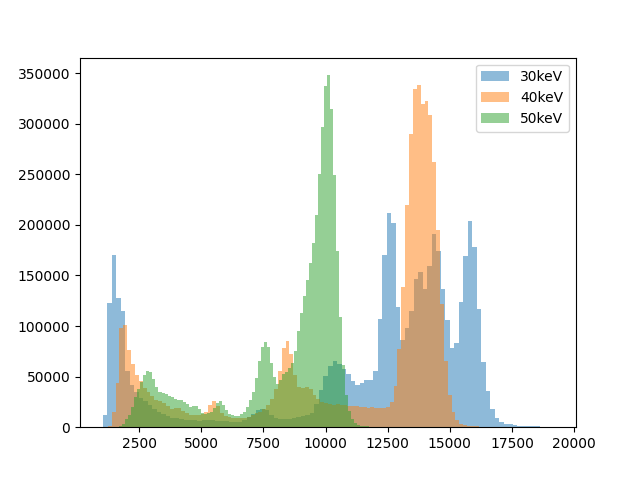

In [245]:
plt.close('all')
plt.hist(trente16bit.flatten(), bins=100, alpha=0.5, label='30keV')
plt.hist(quarante16bit.flatten(), bins=100, alpha=0.5, label='40keV')
plt.hist(cinquante16bit.flatten(), bins=100, alpha=0.5, label='50keV')
#plt.hist(1.2*np.divide(res_mertens-res_mertens.min(),res_mertens.max()-res_mertens.min()).flatten(), bins=100, alpha=0.5, label='mertens')
plt.legend(loc='upper right')
plt.show()

In [ ]:
img_list =[trente16bit, quarante16bit, cinquante16bit]
merge_mertens2 = cv.createMergeMertens()
res_mertens2= merge_mertens2.process(img_list)

plt.close('all')
plt.hist(res_mertens2.flatten(), bins=100, alpha=0.5, label='mertens')
plt.legend(loc='upper right')
plt.show()



In [141]:
res_mertens_16bit = res_mertens.astype('uint16')
cv.imwrite(r"D:\meddah\isi_L3_1\Z5\30-50KeVHDR.tiff", res_mertens_16bit)


True

In [249]:
import algotom.prep.calculation as calc
#center = calc.find_center_vo(trentenorm, trentenorm.shape[1] // 2 - 50, trentenorm.shape[1] // 2 + 50)
center = calc.find_center_vo(res_mertens2, res_mertens2.shape[1] // 2 - 50, res_mertens2.shape[1] // 2 + 50)
# print(center)
# rec_img1 = rec.dfi_reconstruction(rem.remove_all_stripe(trentenorm,3.1, 51, 21), center, angles=None)
rec_img2 = rec.dfi_reconstruction(rem.remove_all_stripe(res_mertens2,3.1, 51, 21), center=center, angles=None)
losa.save_image(r"D:/meddah/isi_L3_1/Z5/recohdr16bit2.tiff", rec_img2)

#center = calc.find_center_vo(res_mertens, res_mertens.shape[1] // 2 - 50, res_mertens.shape[1] // 2 + 50)
#print(center)
# res_mertensnorm = 1.2*np.divide(res_mertens-res_mertens.min(),res_mertens.max()-res_mertens.min())+0.1

# plt.close('all')
# plt.hist(res_mertensnorm.flatten(), bins=100, alpha=0.5, label='mertens')
# plt.show()

#rec_img2 = rec.dfi_reconstruction(rem.remove_all_stripe(res_mertensnorm,3.1, 51, 21), center=1274.5, angles=None)
# losa.save_image(r"M:/HDR/trente.tiff", trente16bit)
# losa.save_image(r"M:/HDR/quarante.tiff", quarante16bit)
# losa.save_image(r"M:/HDR/cinquante.tiff", cinquante16bit)
# losa.save_image(r"D:/meddah/isi_L3_1/Z5/sinohdr.tiff", rem.remove_all_stripe(res_mertensnorm,3.1, 51, 21))


'D:/meddah/isi_L3_1/Z5/recohdr16bit2.tiff'

In [60]:
path30 = r"A:\BAMline-CT\2023\2023_04\isi-L3-1-stepscans\30kev"
proj30 =r"Proj__005873.tif"
imgtest = cv.imread(os.path.join(path30,proj30), -1)
print(imgtest.shape)
print(imgtest[0,0].dtype)


(2160, 2560)
uint16


FloatSlider(value=0.5, description='epsilon 1', max=0.5, min=0.05, step=0.05)

FloatSlider(value=5.0, description='tau 1', max=10.0, min=1.0, step=1.0)

FloatSlider(value=0.5, description='lambda 1', max=1.0, step=0.05)

FloatSlider(value=0.5, description='epsilon 2', max=0.5, min=0.05, step=0.05)

FloatSlider(value=5.0, description='tau 2', max=10.0, min=1.0, step=1.0)

FloatSlider(value=0.5, description='lambda 2', max=1.0, step=0.05)

Button(description='Update', style=ButtonStyle())

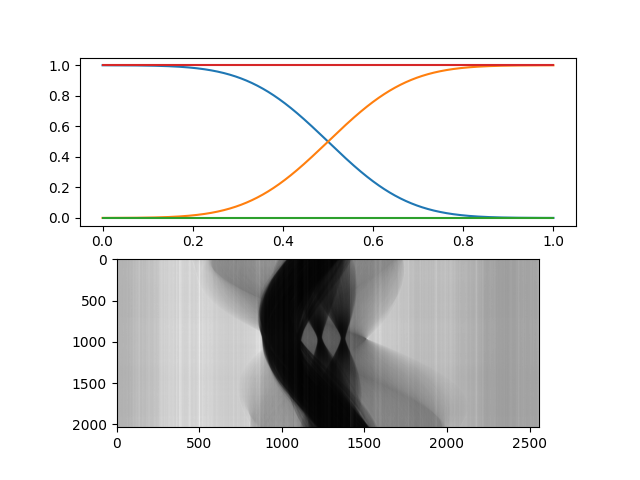

AttributeError: 'list' object has no attribute 'set_ydata'

AttributeError: 'list' object has no attribute 'set_ydata'

AttributeError: 'list' object has no attribute 'set_ydata'

AttributeError: 'list' object has no attribute 'set_ydata'

AttributeError: 'list' object has no attribute 'set_ydata'

AttributeError: 'list' object has no attribute 'set_ydata'

AttributeError: 'list' object has no attribute 'set_ydata'

AttributeError: 'list' object has no attribute 'set_ydata'

AttributeError: 'list' object has no attribute 'set_ydata'

In [252]:
# sigmaslider1 = FloatSlider(min=0, max=0.1, step=0.005, value=0.05, description='sigma 1')
# sigmaslider2 = FloatSlider(min=0, max=0.5, step=0.005, value=0.05, description='sigma 2')
# muslider2 = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='mu 2')
# sigmaslider3 = FloatSlider(min=0, max=0.1, step=0.005, value=0.05, description='sigma 3')

epsilon1 = FloatSlider(min=0.05, max=0.5, step=0.05, value=0.5, description='epsilon 1')
epsilon2 = FloatSlider(min=0.05, max=0.5, step=0.05, value=0.5, description='epsilon 2')
tau1 = FloatSlider(min=1, max=10, step=1, value=5, description='tau 1')
tau2 = FloatSlider(min=1, max=10, step=1, value=5, description='tau 2')
lambda1 = FloatSlider(min=0, max=1, step=0.05, value=0.5, description='lambda 1')
lambda2 = FloatSlider(min=0, max=1, step=0.05, value=0.5, description='lambda 2')
#add a button to update the plot
buttonupd = Button(description="Update")

display(epsilon1, tau1, lambda1, epsilon2, tau2, lambda2, buttonupd)
plt.cla()

def gaussian(x, mean, std):
    return np.exp(-((x - mean)**2) / (2 * std**2)) / (std * np.sqrt(2 * np.pi))/10

sum = np.zeros(shape=(1000,))
y = np.zeros(shape=(10, 1000))

# for i in range(10):
#     x = np.linspace(0, 1, 1000)
#     erf = 1-np.exp(-1.9*x**1.3)
#     #y[i] = gaussian(x, mean=(i+0.5)/10, std=0.08)
#     #sum += y[i]
#     #plt.plot(x, y[i], label=f'$/sigma$={i+1}')

x = np.linspace(0, 1, 1000)
erf1 = 0.5- epsilon1.value *erf(tau1.value*(x-lambda1.value))
erf2 = 0.5+ epsilon2.value *erf(tau2.value*(x-lambda2.value))
gauss1 = 1-(erf1+erf2)
fig, (ax,ax2) = plt.subplots(2)
perf1, = ax.plot(x, erf1, label='erf1')
perf2, = ax.plot(x, erf2, label='erf2')
pgauss1, = ax.plot(x, gauss1, label='gauss1')
sum1 = ax.plot(x, erf1+erf2+gauss1, label='sum')

sino = ax2.imshow(trente, cmap='gray')
ax2.set_aspect(0.5)
#plt.plot(x,y[0]+y[1]+y[2], label='sum2')

plt.show()




# fig, ax = plt.subplots()
# x = np.linspace(0, 1, 1000)
# y1 = gaussian(x, 0, sigmaslider1.value)
# #y2 = gaussian(x, muslider2.value, sigmaslider2.value)
# y3 = gaussian(x, 1, sigmaslider3.value)

# gauss1, = ax.plot(x, y1, label='gauss1')
# gauss2, = ax.plot(x, y3, label='gauss3')
# gauss3, = ax.plot(x, 1-(y1+y2), label='gauss2')
# sumgauss, = ax.plot(x, np.ones(shape=x.shape), label='sum')

def update(_):
    perf1.set_ydata(0.5- epsilon1.value *erf(tau1.value*(x-lambda1.value)))
    perf2.set_ydata(0.5+ epsilon2.value *erf(tau2.value*(x-lambda2.value)))
    pgauss1.set_ydata(1-(perf1.get_ydata()+perf2.get_ydata()))
    sum1.set_ydata(perf1.get_ydata()+perf2.get_ydata()+pgauss1.get_ydata())
    #gauss2.set_ydata(gaussian(x, muslider2.value, sigmaslider2.value))
    #gauss3.set_ydata(1-gaussian(x, 1, sigmaslider3.value)-gaussian(x, 0, sigmaslider1.value))
    #sumgauss.set_ydata(gaussian(x, 0, sigmaslider1.value) + gaussian(x, muslider2.value, sigmaslider2.value) + gaussian(x, 1, sigmaslider3.value))
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle()

def updimg(_):
    sino.set_data(cinquante)
    fig.canvas.draw_idle()


epsilon1.observe(update)
epsilon2.observe(update)
tau1.observe(update)
tau2.observe(update)
lambda1.observe(update)
lambda2.observe(update)
#buttonupd.on_click(updimg)

# display(sigmaslider1, sigmaslider2, muslider2, sigmaslider3)
# sigmaslider1.observe(update)
# sigmaslider2.observe(update)
# muslider2.observe(update)
# sigmaslider3.observe(update)

In [75]:
from PIL import Image
import os
import numpy as np
import pandas as pd

img = []
input_dir = r'A:/BAMline-CT/2023/2023_04/isi-L3-1-stepscans/50kev'

# for f in os.listdir(input_dir):
#     if f.lower().endswith('.tif'):
#         img.append(os.path.join(input_dir, f))

file_name_csv = input_dir + '/csv_list.csv'
csvarr = pd.read_csv(file_name_csv, sep=';')
isFF = csvarr['CT_MICOS_X'] == 36.14
print(csvarr[isFF])

      CT_MICOS_W  CT_MICOS_X
3            0.0       36.14
4            0.0       36.14
5            0.0       36.14
6            0.0       36.14
7            0.0       36.14
...          ...         ...
1800         0.0       36.14
1801         0.0       36.14
1802         0.0       36.14
1803         0.0       36.14
1804         0.0       36.14

[170 rows x 2 columns]


In [13]:
import h5py
import algotom.rec.reconstruction as rec
import algotom.prep.calculation as calc
from PIL import Image
import numpy as np
import os




sino = np.array(Image.open(r'B:/BAMline-CT/2023/2023_04_Reco/isi-L3-1-stepscans/HDR/30k-1680.tif'))

folder_path = r"B:/BAMline-CT/2023/2023_04_Reco/isi-L3-1-stepscans/40kev/40kev_evaluation/Norm"
angles = np.sort(np.loadtxt(os.path.join(folder_path, 'theta_list.txt')))



(1268.6852416992188, 2539.3704833984375, 0, 2039.3704833984375)

In [95]:
h5py.File(r'B:/BAMline-CT/2023/2023_04_Reco/isi-L3-1-stepscans/30kev/30kev_evaluation/Norm/40kev_norm.h5', 'r').close()

In [18]:
calc.find_center_360(sino,win_width=500)

(1267.2550659179688, 2536.5101318359375, 0, 2286.5101318359375)

In [25]:
reco = rec.dfi_reconstruction(sino,center=1200, angles=angles, apply_log=True)
Image.fromarray(reco).save(r'B:/BAMline-CT/2023/2023_04_Reco/isi-L3-1-stepscans/HDR/reco30k-1680.tif')


Small piece of code to rename all stepscans files from 000001 to N
Step scan reco doesn't seem to like switching from 000998 to 000999 for example.

In [91]:
import os
path = r'B:/BAMline-CT/2023/2023_04_Reco/isi-L3-1-stepscans/50kev/50kev'
i = 1
for f in os.listdir(path):
    if f.lower().endswith('.tif'):
        os.rename(os.path.join(path, f), os.path.join(path, f'Proj_{i:06d}.tif'))
        i += 1

print('done')

done


In [99]:
# import h5py
# import numpy as np
# import os
# from PIL import Image
# from joblib import Parallel, delayed

# #load angles from txt
# # Code to create an hdf5 file out of stepscan normalized projections
# # projections saved in a dataset under /entry/data/data
# # angles are recovered from the theta file in the original folder and saved under /entry/instrument/NDAttributes/CT_MICOS_W
# folderfile = r'B:/BAMline-CT/2023/2023_04_Reco/isi-L3-1-stepscans/30kev/30kev_evaluation/Norm'
# angles = np.loadtxt(os.path.join(folderfile, 'theta_list.txt'))
# x_offset_list = np.loadtxt(os.path.join(folderfile, 'x_offset_list.txt'))
# pixel_size = 0.722

# params = np.array((angles, x_offset_list))

# #sort params by angles (1st row)
# params = params[:, params[0, :].argsort()]
# print(params)


# #create hdf5 file
# file = h5py.File(os.path.join(folderfile, '30kev_norm.h5'), 'a')
# # file.create_dataset('/entry/instrument/NDAttributes/CT_MICOS_W', data=angles)
# # file.create_dataset('/entry/data/data',shape=(len(angles), 2160, 2560), chunks=True)

# #create list of tiff filenames in the folder
# filelist = []
# for f in os.listdir(folderfile):
#     if f.lower().endswith('.tif'):
#         filelist.append(f)

# #load images in parallel
# def load_images(i):
#         print(filelist[i])
#         file['/entry/data/data'][i,:,:] = np.array(Image.open(os.path.join(folderfile, filelist[i])))

# results = Parallel(n_jobs=16, prefer="threads")(delayed(load_images)(i) for i in range(len(filelist)))

# # ndimage.shift(np.single(np.array(np.array(Image.open(os.path.join(folderfile, f))))),
# #                                             [-(x_offset_list[i] / pixel_size), 0],
# #                                             order=3, mode='nearest', prefilter=True)

# # def load_images():
# #     for f in os.listdir(folderfile):
# #         if f.lower().endswith('.tif'):
# #             print(i)
# #             file['/entry/data/data'][i,:,:] = np.array(Image.open(os.path.join(folderfile, f)))
# #             i += 1



# results = Parallel(n_jobs=16, prefer="threads")(delayed(ndi.gaussian_filter)(data[:, i, :], (3, 5), 0) for i in range(n_slice))

# load_images()
#file.visititems(print)
file.close()
os.remove(r"B:\BAMline-CT\2023\2023_04_Reco\isi-L3-1-stepscans\30kev\30kev_evaluation\Norm\40kev_norm.h5")

PermissionError: [WinError 32] Der Prozess kann nicht auf die Datei zugreifen, da sie von einem anderen Prozess verwendet wird: 'B:\\BAMline-CT\\2023\\2023_04_Reco\\isi-L3-1-stepscans\\30kev\\30kev_evaluation\\Norm\\40kev_norm.h5'

In [84]:
sino30 = np.array(Image.open(r'B:/BAMline-CT/2023/2023_04_Reco/isi-L3-1/z5-30kev-1580.tif'))
sino40 = np.array(Image.open(r'B:/BAMline-CT/2023/2023_04_Reco/isi-L3-1/z5-40kev-1580.tif'))
sino50 = np.array(Image.open(r'B:/BAMline-CT/2023/2023_04_Reco/isi-L3-1/z5-50kev-1580.tif'))
